In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
fit = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
fit.shape

(2580, 80)

In [4]:
X = fit.drop(['SalePrice'], axis=1).values
y = fit.SalePrice.values

In [5]:
ylog = np.log10(y)

In [6]:
ordinal_Log10 = fit.assign(Log10 = ylog)
ordinal_Log10

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,5.100371
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,5.144574
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,5.096562
3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5.056905
4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,5.356026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5.082785
2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,5.144885
2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,5.161368
2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,1.0,9.0,4.0,1842,217

In [7]:
I = ordinal_Log10.values

In [8]:
iso = IsolationForest(n_estimators=1000, max_samples=750, contamination=0.0125).fit(I)

In [9]:
Iord = ordinal_Log10.assign(I = iso.predict(I))
Iord

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10,I
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,5.100371,1
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,5.144574,1
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,5.096562,1
3,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,1039,114000,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5.056905,1
4,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1665,227000,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,5.356026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,6.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,1.0,1.0,6.0,2.0,5.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,952,121000,68.516053,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5.082785,1
2576,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1733,139600,68.516053,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,5.144885,1
2577,15.0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,6.0,1.0,4.0,0.0,0.0,4.0,6.0,3.0,0.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,1.0,9.0,4.0,2002,145000,82.000000,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,5.161368,1
2578,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.

In [10]:
Iord[Iord.I==-1]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10,I
23,11.0,6.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,4.0,0.0,11.0,12.0,2.0,2.0,4.0,4.0,5.0,1.0,3.0,6.0,6.0,2.0,4.0,0.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,7.0,3.0,9.0,4.0,2640,265979,65.000000,11700,7,7,1880,2003,0.0,0.0,0.0,1240.0,1240.0,1320,1320,0,0.0,0.0,1,1,4,1,8,1,1950.000000,4.0,864.0,181,0,386,0,0,0,0,5.424847,-1
50,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,5.0,6.0,3.0,1.0,0.0,0.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,0.0,1.0,9.0,1.0,2592,150000,60.000000,10890,5,6,1923,1950,0.0,371.0,0.0,925.0,1296.0,1296,1296,0,2.0,0.0,2,0,6,2,12,0,1976.982048,0.0,0.0,0,742,240,0,0,0,1512,5.176091,-1
65,5.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,0.0,5.0,5.0,2.0,0.0,4.0,1.0,4.0,2.0,9.0,4.0,2470,615000,106.000000,12720,10,5,2003,2003,680.0,2257.0,0.0,278.0,2535.0,2470,0,0,2.0,0.0,1,1,1,1,7,2,2003.000000,3.0,789.0,154,65,0,0,216,144,0,5.788875,-1
205,9.0,6.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,1.0,1.0,1.0,5.0,1.0,3.0,6.0,6.0,1.0,1.0,1.0,4.0,4.0,5.0,3.0,5.0,3.0,5.0,1.0,0.0,3.0,4.0,1.0,11.0,1.0,0.0,0.0,1484,50000,60.000000,10320,4,1,1910,1950,0.0,0.0,0.0,771.0,771.0,866,504,114,0.0,0.0,2,0,3,1,6,0,1910.000000,1.0,264.0,14,211,0,0,84,0,0,4.698970,-1
267,11.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,0.0,3.0,5.0,3.0,1.0,4.0,0.0,3.0,4.0,1.0,2.0,2.0,3.0,4.0,1086,55000,60.000000,11340,2,1,1920,1950,0.0,0.0,0.0,723.0,723.0,723,363,0,0.0,0.0,1,0,2,1,5,0,1920.000000,2.0,400.0,0,24,144,0,0,0,0,4.740363,-1
294,15.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,0.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,2.0,2.0,9.0,0.0,1800,130000,113.000000,8513,5,5,1961,1961,0.0,0.0,0.0,1800.0,1800.0,1800,0,0,0.0,0.0,2,0,6,2,10,0,1976.982048,0.0,0.0,0,0,0,0,0,0,0,5.113943,-1
309,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,4676,184750,130.000000,40094,10,5,2007,2008,762.0,2260.0,0.0,878.0,3138.0,3138,1538,0,1.0,0.0,3,1,3,1,11,1,2007.000000,3.0,884.0,208,406,0,0,0,0,0,5.266584,-1
427,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,20.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,3.0,6.0,6.0,1.0,4.0,0.0,4.0,4.0,6.0,2.0,5.0,3.0,1.0,1.0,0.0,3.0,4.0,1.0,8.0,4.0,9.0,0.0,832,12789,68.000000,9656,2,2,1923,1970,0.0,0.0,0.0,678.0,678.0,832,0,0,0.0,0.0,1,0,2,1,5,1,1928.000000,2.0,780.0,0,0,0,0,0,0,0,4.106837,-1
487,13.0,5.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,27.0,2.0,2.0,0.0,7.0,1.0,0.0,14.0,14.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0,2.0,0.0,1.0,0.0,0.0,9.0,4.0,2646,260000,100.000000,14330,7,4,1974,1974,145.0,1023.0,497.0,228.0,1748.0,2151,495,0,1.0,2.0,2,0,3,1,9,4,1974.000000,2.0,550.0,641,100,0,0,0,800,0,5.414973,-1
533,10.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,0.0,5.0,0.0,

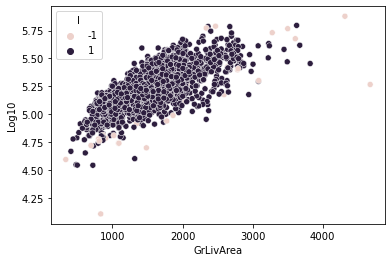

In [11]:
sns.scatterplot(data=Iord, x='GrLivArea', y='Log10', hue='I');

In [12]:
Iord_DropSP = Iord.drop(['SalePrice'], axis=1)

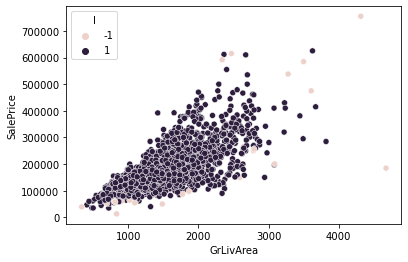

In [13]:
sns.scatterplot(data=Iord, x='GrLivArea', y='SalePrice', hue='I');